In [13]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz


tip = ctrl.Consequent(np.arange(0, 26, 1), 'Tip')
qual = ctrl.Antecedent(np.arange(0, 11, 1), 'Quality')
serv = ctrl.Antecedent(np.arange(0, 11, 1), 'Service')


inter = ctrl.Antecedent(np.arange(0, 11, 1), 'Interior')
quota = ctrl.Antecedent(np.arange(0, 11, 1), 'Quota')
 
    
qual.automf(5)
serv.automf(5)
inter.automf(5)
quota.automf(5)


tip['poor'] = fuzz.trimf(tip.universe, [0, 0, 5])
tip['bad'] = fuzz.trimf(tip.universe, [0, 5, 10])
tip['average'] = fuzz.trimf(tip.universe, [5, 10, 15])
tip['descent'] = fuzz.trimf(tip.universe, [10, 15, 20])
tip['great'] = fuzz.trimf(tip.universe, [20, 25, 25])


C:\Users\User\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


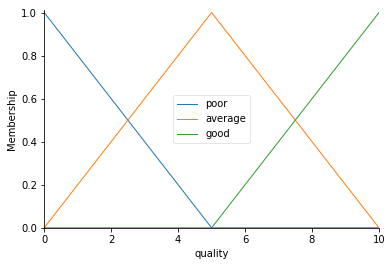

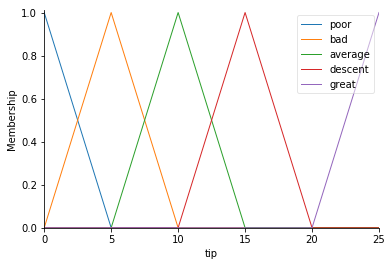

In [7]:
%matplotlib inline
qual.view()
tip.view()

In [14]:
rule1 = ctrl.Rule(qual['poor'] | serv['poor'], tip['poor'])
rule2 = ctrl.Rule(inter['poor'] | quota['good'], tip['bad'])
rule3 = ctrl.Rule(serv['good'] | qual['average'], tip['descent'])
rule4 = ctrl.Rule(serv['good'] | qual['good'], tip['great'])
rule5 = ctrl.Rule(serv['good'] | inter['good'], tip['great'])
rule6 = ctrl.Rule(quota['good'] | inter['good'], tip['great'])
rule7 = ctrl.Rule(serv['average'], tip['average'])
rule8 = ctrl.Rule(serv['average'] | inter['poor'], tip['bad'])
rule9 = ctrl.Rule(quota['average'] | qual['good'], tip['great'])

In [15]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

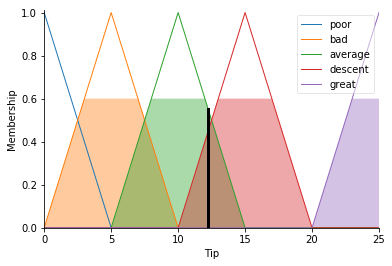

In [16]:
from ipywidgets import interact_manual
@interact_manual
def get_input(qual=4, serv=4, inter=4, quota=4):
    tipping.input['Quality'] = qual
    tipping.input['Service'] = serv
    tipping.input['Interior'] = inter
    tipping.input['Quota'] = quota
    
    tipping.compute()
    
    print('Recommended tip',tipping.output['Tip'])
    tip.view(sim=tipping)